<a href="https://colab.research.google.com/github/the-cryptozoologist/data-science/blob/main/spectral/colors_of_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power spectra of noise signals

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.fftpack as fftpack

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

import random

In [28]:
npnts = int(1e5)

whitenoise = np.random.randn(npnts)
brownnoise = np.cumsum(whitenoise)

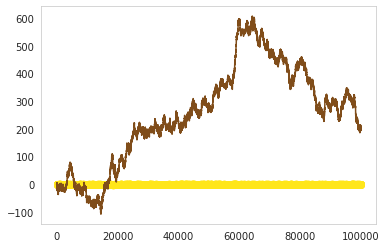

In [29]:
plt.plot(whitenoise, "o", markersize=5, color=[1,0.9,0.1])
plt.plot(brownnoise, color=[0.5,0.3,0.1])
plt.show()

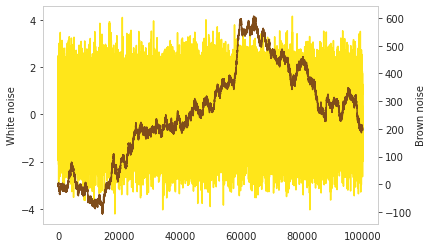

In [30]:
fig, ax = plt.subplots(1)

ax.plot(whitenoise, color=[1,0.9,0.1])
ax.set_ylabel("White noise")

ax2 = ax.twinx()
ax2.plot(brownnoise, color=[0.5,0.3,0.1])
ax2.set_ylabel("Brown noise")

plt.show()

In [31]:
wnX = np.abs(fftpack.fft(whitenoise))/npnts
bnX = np.abs(fftpack.fft(brownnoise))/npnts

fX = np.linspace(0,1,int(npnts/2+1))

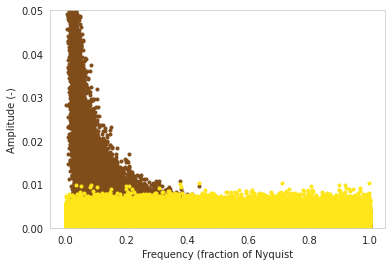

In [32]:
plt.plot(fX, bnX[:len(fX)], ".", color=[0.5,0.3,0.1])
plt.plot(fX, wnX[:len(fX)], ".", color=[1,0.9,0.1])
plt.ylim([0,0.05])
plt.xlabel("Frequency (fraction of Nyquist")
plt.ylabel("Amplitude (-)")

plt.show()

In [49]:
fc_phs = 2 * np.pi * np.random.randn(int(npnts/2+1))
fc_amp = 1 / (fX+0.01) + np.random.randn(int(npnts/2+1))**2 * 5

FourierSpect = np.zeros(npnts, dtype=complex)
FourierSpect[:int(npnts/2+1)] = fc_amp * np.exp(1j*fc_phs)

In [50]:
pinknoise = np.real(fftpack.ifft(FourierSpect))

In [51]:
pnX = np.abs(fftpack.fft(pinknoise))/npnts

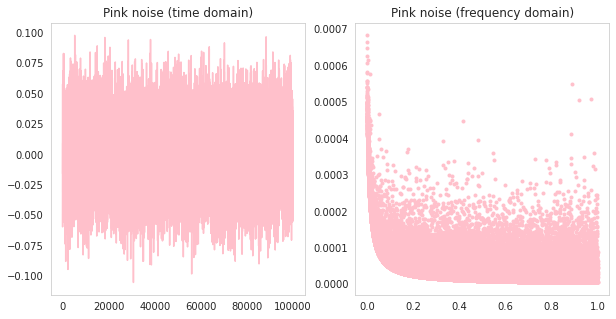

In [52]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(pinknoise, color="pink")
ax[0].set_title("Pink noise (time domain)")

ax[1].plot(fX, pnX[:len(fX)], ".", color="pink")
ax[1].set_title("Pink noise (frequency domain)")

plt.show()

In [53]:
fc_phs_blue = 2 * np.pi * np.random.randn(int(npnts/2+1))
fc_amp_blue = np.linspace(1,3,int(npnts/2+1)) + np.random.randn(int(npnts/2+1)) / 5

FourierSpect_blue = np.zeros(npnts, dtype=complex)
FourierSpect_blue[:int(npnts/2+1)] = fc_amp_blue * np.exp(1j*fc_phs_blue)

In [54]:
bluenoise = np.real(fftpack.ifft(FourierSpect_blue))

In [55]:
blnX = np.abs(fftpack.fft(bluenoise))/npnts

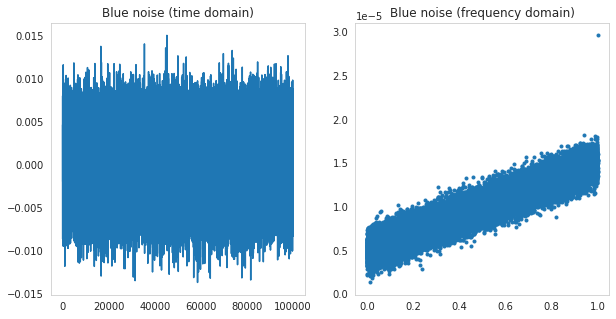

In [56]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(bluenoise)
ax[0].set_title("Blue noise (time domain)")

ax[1].plot(fX, blnX[:len(fX)], ".")
ax[1].set_title("Blue noise (frequency domain)")

plt.show()

In [65]:
def whitenoise_spectrify(amp):
  global npnts
  noise = amp * np.random.randn(npnts)
  return abs(fftpack.fft(noise)/(npnts))

def brownnoise_spectrify(amp):
  global npnts
  noise = np.cumsum(amp * np.random.randn(npnts))
  return abs(fftpack.fft(noise)/(npnts))

def pinknoise_spectrify(amp):
  global fX
  global npnts
  FourierSpect = np.zeros(npnts, dtype=complex)
  fc_amp = 1/ (fX + 0.01) + np.random.randn(int(npnts/2+1))**2 * 5
  fc_phys = 2 * np.pi * np.random.rand(int(npnts/2+1))
  FourierSpect[:int(npnts/2+1)] = fc_amp * np.exp(1j * fc_phs)
  noise = amp * np.real(fftpack.ifft(FourierSpect))
  return abs(fftpack.fft(noise)/npnts)

def bluenoise_spectrify(amp):
  global fX
  global npnts
  FourierSpect = np.zeros(npnts, dtype=complex)
  fc_amp = np.linspace(1,3,int(npnts/2+1)) + np.random.randn(int(npnts/2+1)) / 5
  fc_phys = 2 * np.pi * np.random.rand(int(npnts/2+1))
  FourierSpect[:int(npnts/2+1)] = fc_amp * np.exp(1j * fc_phs)
  noise = amp * np.real(fftpack.ifft(FourierSpect))
  return abs(fftpack.fft(noise)/npnts)

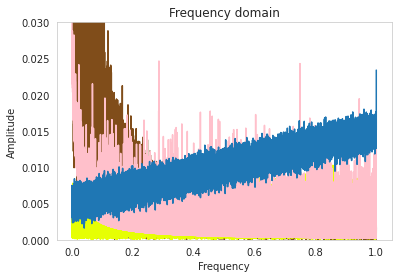

In [77]:
plt.plot(fX, brownnoise_spectrify(1)[:len(fX)], color = [0.5,0.3,0.1])
plt.plot(fX, whitenoise_spectrify(1)[:len(fX)], color = [0.9,1,0.01])
plt.plot(fX, pinknoise_spectrify(50)[:len(fX)], color = "pink")
plt.plot(fX, bluenoise_spectrify(1000)[:len(fX)])
plt.title("Frequency domain")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.ylim((0,0.03))
plt.show()

In [78]:
from IPython.display import Audio

In [80]:
print("White noise")
Audio(whitenoise, rate = 44100)

White noise


In [81]:
print("Brown noise")
Audio(brownnoise, rate = 44100)

Brown noise


In [82]:
print("Pink noise")
Audio(pinknoise, rate = 44100)

Pink noise


In [83]:
print("Blue noise")
Audio(bluenoise, rate = 44100)

Blue noise
